In [13]:
import random
import matplotlib.pyplot as plt
import PyQt5
import os

import cv2
import numpy as np
import json
import png
from scipy.spatial.distance import cdist
from tqdm import tqdm
from PIL import Image

### 1. Preprocessing / general stuff

Useful info:    
1. `dict_instances` is dictionary of ALL instances in the entire environment. Every instance has a unique ID.    
2. `dict_semantics` is dictionary of ... semantics... . Every semantic ...

In [14]:
def FrequencyListToDict(my_list): 
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1

    return freq

In [15]:
# Set filenames

# Extracting dict_instances from the txt file
filename = "instance-labels-ALL-apartment_0.txt" # File containing instance labels and corresponding unique ids


#only useful things
set_semantics = set() 
dict_instances = {}

list_ids = []
set_ids = set()
list_semantics = []
with open(filename) as fh:
    l = 1
    for line in fh:
        description = list(line.strip().split())
        list_ids.append(description[0])
        list_semantics.append(description[1])
        
        set_ids.add(description[0])
        set_semantics.add(description[1])
        
        dict_instances.update({description[0]:description[1]})
        
        l = l + 1    

In [16]:
dict_semantics = {}
i_sem=0
for set_s in set_semantics:
    dict_semantics.update({set_s:i_sem})
    i_sem = i_sem + 1

In [17]:
dict_semantics

{'switch': 0,
 'base-cabinet': 1,
 'basket': 2,
 'mat': 3,
 'window': 4,
 'countertop': 5,
 'curtain': 6,
 'bottle': 7,
 'cabinet': 8,
 'comforter': 9,
 'major-appliance': 10,
 'panel': 11,
 'faucet': 12,
 'cup': 13,
 'chair': 14,
 'toilet': 15,
 'book': 16,
 'pillow': 17,
 'bathtub': 18,
 'sink': 19,
 'rug': 20,
 'wall': 21,
 'indoor-plant': 22,
 'wall-cabinet': 23,
 'handrail': 24,
 'stair': 25,
 'floor': 26,
 'table': 27,
 'pot': 28,
 'plant-stand': 29,
 'cushion': 30,
 'desk': 31,
 'vase': 32,
 'sofa': 33,
 'stool': 34,
 'blinds': 35,
 'ceiling': 36,
 'lamp': 37,
 'shower-stall': 38,
 'door': 39,
 'bed': 40,
 'rack': 41,
 'picture': 42,
 'refrigerator': 43,
 'cooktop': 44,
 'vent': 45,
 'wall-plug': 46,
 'plate': 47,
 'nightstand': 48}

### 2. Main code starts: Feature vector of dim 49 with value as freq for every image

In [5]:
# refList_ofarrays = []
refVect = np.zeros((727, 49))

for i_ref in range(727): #727
    instance_seg = cv2.imread("./raw_data_reference/" + str(i_ref) + "_instance-seg.png", -1)
    instance_seg_np = np.array(instance_seg)
    instance_seg_np = np.unique(instance_seg_np)
    
    list_img0 = []

    for ite_ref in range(instance_seg_np.shape[0]):
        list_img0.append(dict_instances.get(str(instance_seg_np[ite_ref]), 'ERROR'))

    dict_img0 = FrequencyListToDict(list_img0)

    arr_img0 = np.zeros(len(dict_semantics))

    # for i in range(len(dict_semantics)):
    for key in dict_img0:
        if key is not 'ERROR':
            arr_img0[dict_semantics[key]] = dict_img0[key]
    #         print(key, dict_semantics[key])
#     refList_ofarrays.append(arr_img0)
    refVect[i_ref] = arr_img0
    

In [6]:
qryVect = np.zeros((10, 49))

qry_ids = np.array([757,766,824,869,891,910,930,1179,1195,1205])
for j_qry in range(10): #10
    instance_seg = cv2.imread("./raw_data_queries/" + str(qry_ids[j_qry]) + "_instance-seg.png", -1)
    instance_seg_np = np.array(instance_seg)
    instance_seg_np = np.unique(instance_seg_np)
    
    list_img0 = []

    for ite_qry in range(instance_seg_np.shape[0]):
        list_img0.append(dict_instances.get(str(instance_seg_np[ite_qry]), 'ERROR'))

    dict_img0 = FrequencyListToDict(list_img0)

    arr_img0 = np.zeros(len(dict_semantics))

    # for i in range(len(dict_semantics)):
    for key in dict_img0:
        if key is not 'ERROR':
            arr_img0[dict_semantics[key]] = dict_img0[key]
    #         print(key, dict_semantics[key])
    qryVect[j_qry] = arr_img0
    

In [7]:
# qryVect[9]
# dict_semantics

### 3. Matching using some similarity metric


In [8]:
print(refVect.shape, qryVect.shape)

(727, 49) (10, 49)


In [9]:
def getMatchInds(ft_ref,ft_qry,topK=1,metric='euclidean'):
    """
    metric: 'euclidean' or 'cosine'
    """
    print(f"debug: {ft_ref.shape}, {ft_qry.shape}")
    dMat = cdist(ft_ref,ft_qry,metric)
    mInds = np.argsort(dMat,axis=0)[:topK] # shape: K x ft_qry.shape[0]
    return mInds

mInds = getMatchInds(refVect, qryVect)
mInds = mInds.reshape(10)

debug: (727, 49), (10, 49)


In [10]:
mInds

array([694, 684,   8, 234, 220, 213, 153, 196, 204, 158])

In [11]:
qry_ids

array([ 757,  766,  824,  869,  891,  910,  930, 1179, 1195, 1205])

Query | Matched Reference
(1080, 1920, 4) (1080, 1920, 4)


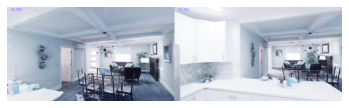

(1080, 1920, 4) (1080, 1920, 4)


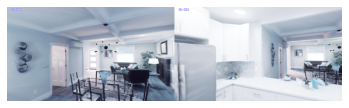

(1080, 1920, 4) (1080, 1920, 4)


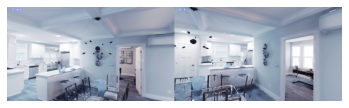

(1080, 1920, 4) (1080, 1920, 4)


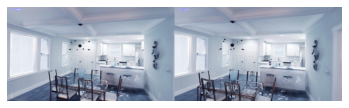

(1080, 1920, 4) (1080, 1920, 4)


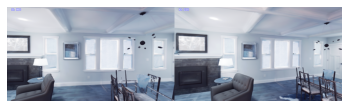

(1080, 1920, 4) (1080, 1920, 4)


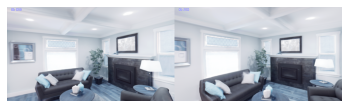

(1080, 1920, 4) (1080, 1920, 4)


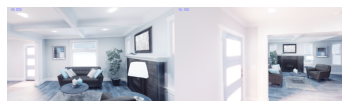

(1080, 1920, 4) (1080, 1920, 4)


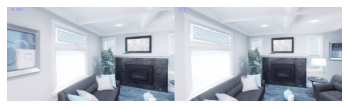

(1080, 1920, 4) (1080, 1920, 4)


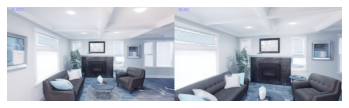

(1080, 1920, 4) (1080, 1920, 4)


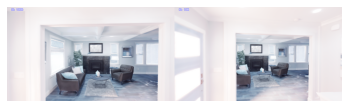

In [12]:
print("Query | Matched Reference")
for i_fin in range(mInds.shape[0]):
    rgb_qry = cv2.imread("./raw_data_queries/" + str(qry_ids[i_fin]) + "_rgb.png", -1)
    rgb_ref = cv2.imread("./raw_data_reference/" + str(mInds[i_fin]) + "_rgb.png", -1)
    rgb_qry = np.array(rgb_qry)
    rgb_ref = np.array(rgb_ref)
    
    print(rgb_qry.shape, rgb_ref.shape)
    concat = np.concatenate([rgb_qry, rgb_ref],axis=1)
    plt.imshow(concat)
    plt.axis('off')
    plt.show()
    
    rgb_img_save = cv2.imwrite("./results/" + str(i_fin) + "_rgb.png", concat)
#     rgb_img_save.save()